In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X, y = load_iris(return_X_y=True)
print(f"Dataset Iris: {X.shape[0]} echantillons, {X.shape[1]} features")
print(f"Classes: {np.unique(y)}, distribution: {np.bincount(y)}")

Dataset Iris: 150 echantillons, 4 features
Classes: [0 1 2], distribution: [50 50 50]


In [2]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=200, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

folds = {
    '5-fold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    '10-fold': StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
}

scoring = ['accuracy', 'f1_macro']

In [4]:
results_table = []
all_scores = {} 

for model_name, model in models.items():
    for fold_name, cv_strategy in folds.items():
        cv_results = cross_validate(
            model, X, y, cv=cv_strategy,
            scoring=scoring,
            return_train_score=True
        )

        test_acc = cv_results['test_accuracy']
        test_f1 = cv_results['test_f1_macro']
        train_acc = cv_results['train_accuracy']
        fit_time = cv_results['fit_time']

        key = f"{model_name}\n({fold_name})"
        all_scores[key] = test_acc

        results_table.append({
            'model': model_name,
            'cv': fold_name,
            'test_acc_mean': test_acc.mean(),
            'test_acc_std': test_acc.std(),
            'test_f1_mean': test_f1.mean(),
            'test_f1_std': test_f1.std(),
            'train_acc_mean': train_acc.mean(),
            'fit_time_mean': fit_time.mean()
        })

        acc_str = f"{test_acc.mean():.4f} +/- {test_acc.std():.4f}"
        f1_str = f"{test_f1.mean():.4f} +/- {test_f1.std():.4f}"
        print(f"{model_name} {fold_name} accuracy : {acc_str} | f1 : {f1_str}")

LogisticRegression 5-fold accuracy : 0.9667 +/- 0.0298 | f1 : 0.9665 +/- 0.0300
LogisticRegression 10-fold accuracy : 0.9667 +/- 0.0333 | f1 : 0.9663 +/- 0.0337
RandomForest 5-fold accuracy : 0.9467 +/- 0.0267 | f1 : 0.9464 +/- 0.0268
RandomForest 10-fold accuracy : 0.9533 +/- 0.0521 | f1 : 0.9526 +/- 0.0531


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_16184\4020557395.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot(data, labels=labels, patch_artist=True, widths=0.6)


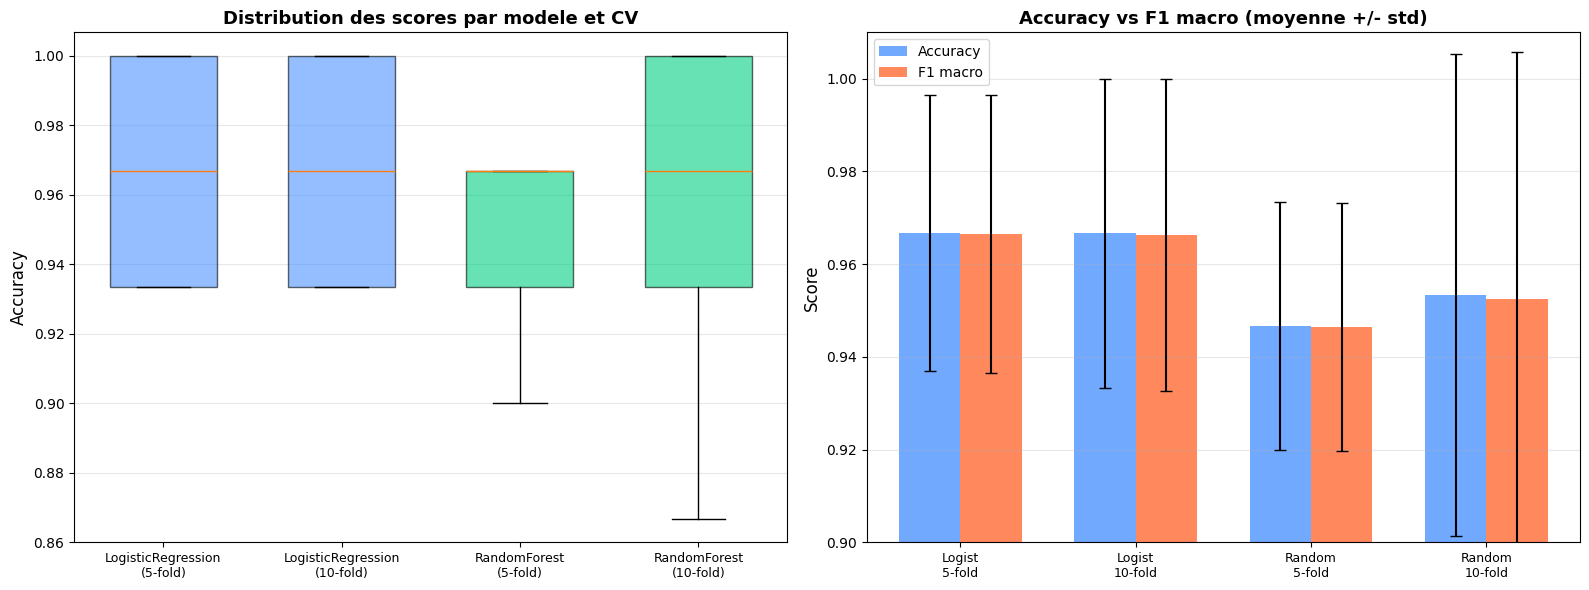

In [5]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

labels = list(all_scores.keys())
data = list(all_scores.values())

bp = axes[0].boxplot(data, labels=labels, patch_artist=True, widths=0.6)
colors = ['#4d94ff', '#4d94ff', '#00d084', '#00d084']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Distribution des scores par modele et CV', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', labelsize=9)


x = np.arange(len(results_table))
width = 0.35

acc_means = [r['test_acc_mean'] for r in results_table]
acc_stds = [r['test_acc_std'] for r in results_table]
f1_means = [r['test_f1_mean'] for r in results_table]
f1_stds = [r['test_f1_std'] for r in results_table]

bars1 = axes[1].bar(x - width/2, acc_means, width, yerr=acc_stds,
                     label='Accuracy', color='#4d94ff', alpha=0.8, capsize=4)
bars2 = axes[1].bar(x + width/2, f1_means, width, yerr=f1_stds,
                     label='F1 macro', color='#ff6b35', alpha=0.8, capsize=4)

xlabels = [f"{r['model'][:6]}\n{r['cv']}" for r in results_table]
axes[1].set_xticks(x)
axes[1].set_xticklabels(xlabels, fontsize=9)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Accuracy vs F1 macro (moyenne +/- std)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim(0.9, 1.01)

plt.tight_layout()
plt.show()